<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# Dask - Parallelize Operations on Multiple CSVs
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/D-Tale/Dask_parallelize_operations_on_multiple_csvs.ipynb" target="_parent"><img src="https://naasai-public.s3.eu-west-3.amazonaws.com/open_in_naas.svg"/></a>

**Tags:** #csv #pandas #snippet #read #dataframe #parallel #parallelize #dask #operations

**Author:** [Minura Punchihewa](https://www.linkedin.com/in/minurapunchihewa/)

## Input

### Install Dask

In [1]:
! python -m pip install "dask[complete]"

### Import Dask

In [2]:
import dask.dataframe as dd

### Variable

In [3]:
folder_path = "/home/minura/Documents/work/open-source/naas/data/nycflights/"

## Model

### Read the CSV files from path

In [4]:
# when the actual data types of given columns cannot be inferred from the first few examples
# they need to be specified manually
# this is where the dtype parameters comes in
df = dd.read_csv(folder_path + '*.csv', 
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})

## Output

### Calculate the max of a column

In [5]:
# no operation is actually performed until the .compute() function is called
df['DepDelay'].max().compute()

1435.0

### Visualize the parallel execution of the operation

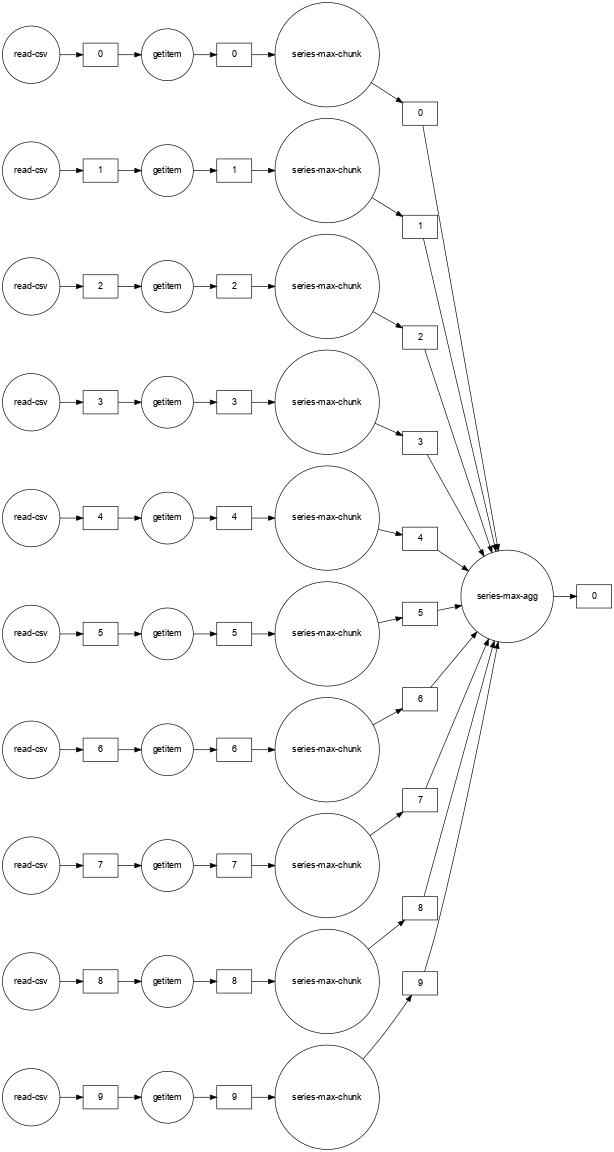

In [6]:
# the underlying task graph can be viewed to understand how the parallel execution takes place
df.DepDelay.max().visualize(rankdir="LR", size="12, 12!")

## Comparison

### Pandas

In [7]:
import pandas as pd
import glob

In [8]:
%%time
# the equivalent operation performed using Pandas
all_files = glob.glob(folder_path + '*.csv')
dfs = []
for file in all_files:
    dfs.append(pd.read_csv(file, parse_dates={'Date': [0, 1, 2]}))
df = pd.concat(dfs, axis=0)
df.DepDelay.max()

CPU times: user 5.02 s, sys: 378 ms, total: 5.4 s
Wall time: 5.39 s


1435.0

### Dask

In [9]:
%%time
# the entire operation again performed using Dask
df = dd.read_csv(folder_path + '*.csv', 
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool})
df['DepDelay'].max().compute()

# Dask clearly performs better in comparison to Pandas
# the performance benefits are more apparent when working on larger datasets
# especially when the size of the data exceeds available memory

CPU times: user 8.48 s, sys: 499 ms, total: 8.98 s
Wall time: 3.73 s


1435.0